# Análisis Exploratorio de Datos (EDA) – Aparcamientos

En este notebook realizamos un análisis exploratorio de los datos de plazas disponibles en aparcamientos con el fin de identificar patrones de comportamiento y estacionalidad.

## Objetivos principales:
- Visualizar la disponibilidad de plazas agrupando por aparcamiento.
- Analizar la ocupación agregada por:
  - Año
  - Mes
  - Día de la semana
  - Hora del día
- Detectar comportamientos cíclicos y posibles señales de estacionalidad.
- Identificar diferencias entre aparcamientos y periodos temporales.

Este análisis será clave para construir modelos predictivos que capturen adecuadamente las variaciones regulares en la ocupación de los parkings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df

,idAparcamiento,PlazasTotales,PlazasDisponibles,PorcPlazasDisponibles,year,month,day,weekday
timestamp,,,,,,,,
2023-02-03 10:00:00,6,372.0,60.0,16.129032,2023,2,3,4
2023-02-03 11:00:00,6,372.0,48.0,12.903226,2023,2,3,4
2023-02-03 12:00:00,6,372.0,66.0,17.741935,2023,2,3,4
2023-02-03 13:00:00,6,372.0,119.0,31.989247,2023,2,3,4
2023-02-03 14:00:00,6,372.0,155.0,41.666667,2023,2,3,4
...,...,...,...,...,...,...,...,...
2025-03-05 03:00:00,78,464.0,355.0,76.508621,2025,3,5,2
2025-03-05 04:00:00,78,464.0,355.0,76.508621,2025,3,5,2
2025-03-05 05:00:00,78,464.0,356.0,76.724138,2025,3,5,2


In [5]:
df = pd.read_csv("../data/processed/data_processed.csv")
#convertir variable temporal a indice de la serie y convertir a formato fecha
df.set_index("timestamp", inplace= True)
df.index = pd.to_datetime(df.index) 

# #crear columna: porcentaje de plazas ocupadas
# df["availability_pct"] = (df["availableSpotNumber_imputed"] / df["totalSpotNumber"]) * 100

# #renombrar columnas
# df.rename(columns={
#     "idAparcamiento": "idAparcamiento",
#     "totalSpotNumber": "PlazasTotales",
#     "availableSpotNumber_imputed": "PlazasDisponibles",
#     "availability_pct": "PorcPlazasDisponibles"
# }, inplace=True)

Visualizar disponibilidad para cada parking,

In [7]:
df

,idAparcamiento,PlazasTotales,PlazasDisponibles,PorcPlazasDisponibles,year,month,day,weekday
timestamp,,,,,,,,
2023-02-03 10:00:00,6,372.0,60.0,16.129032,2023,2,3,4
2023-02-03 11:00:00,6,372.0,48.0,12.903226,2023,2,3,4
2023-02-03 12:00:00,6,372.0,66.0,17.741935,2023,2,3,4
2023-02-03 13:00:00,6,372.0,119.0,31.989247,2023,2,3,4
2023-02-03 14:00:00,6,372.0,155.0,41.666667,2023,2,3,4
...,...,...,...,...,...,...,...,...
2025-03-05 03:00:00,78,464.0,355.0,76.508621,2025,3,5,2
2025-03-05 04:00:00,78,464.0,355.0,76.508621,2025,3,5,2
2025-03-05 05:00:00,78,464.0,356.0,76.724138,2025,3,5,2


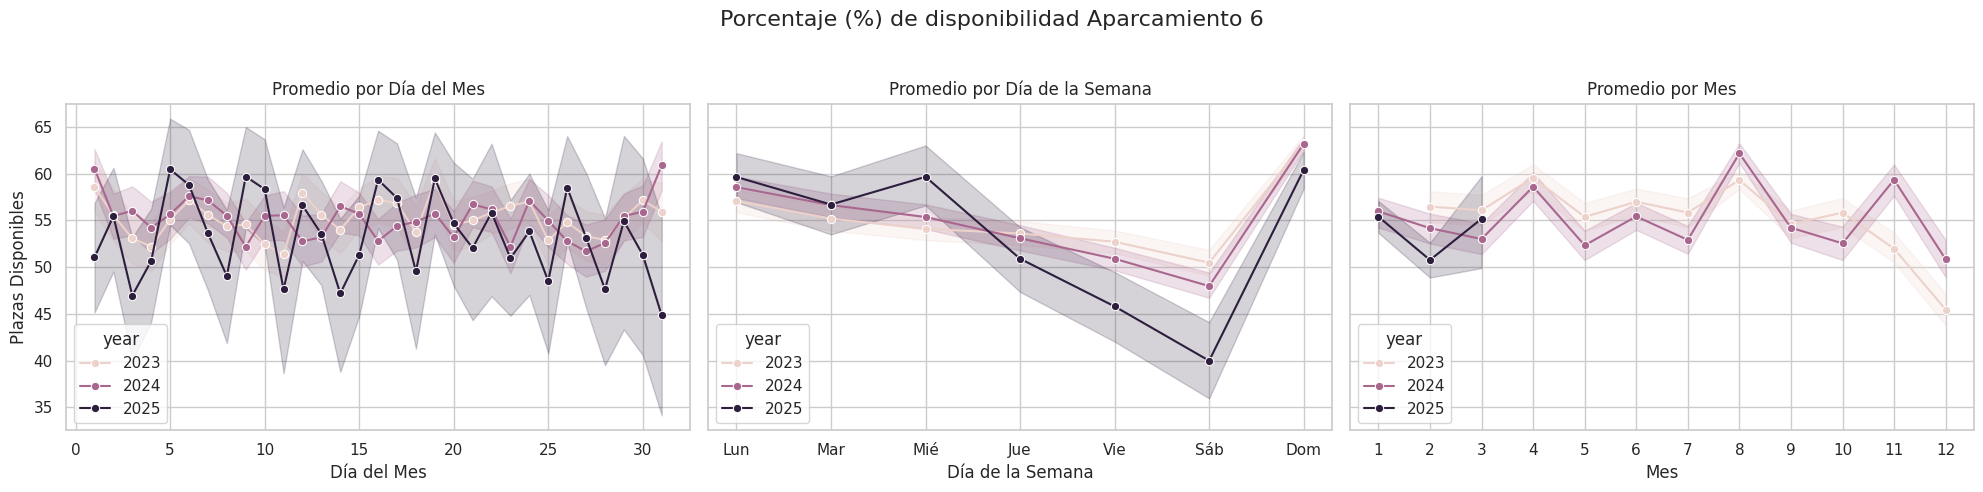

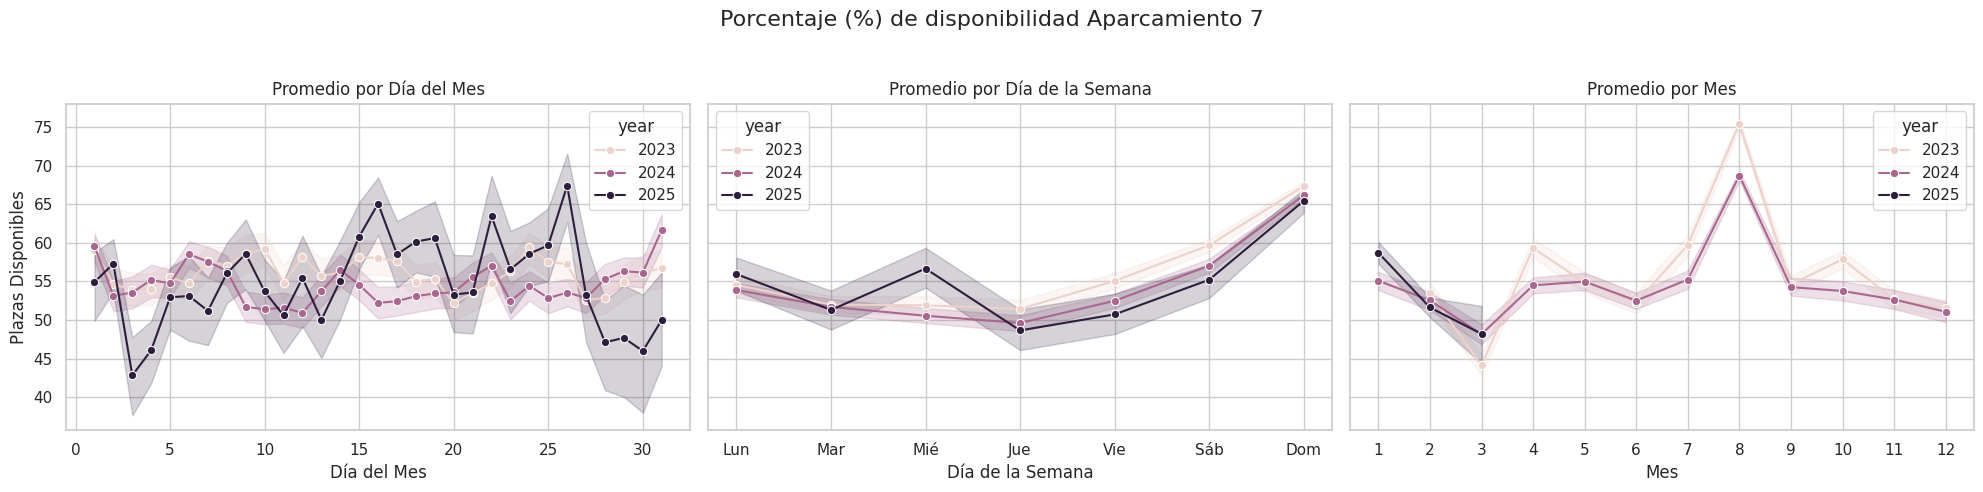

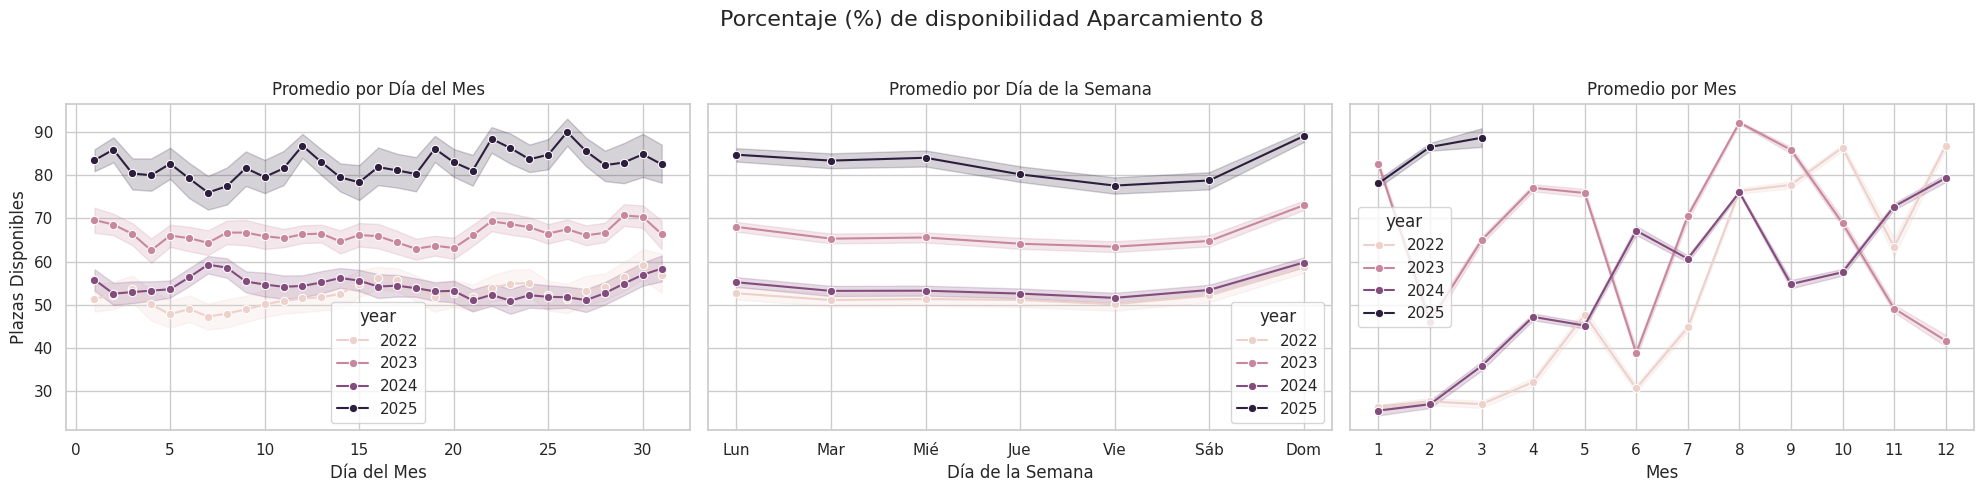

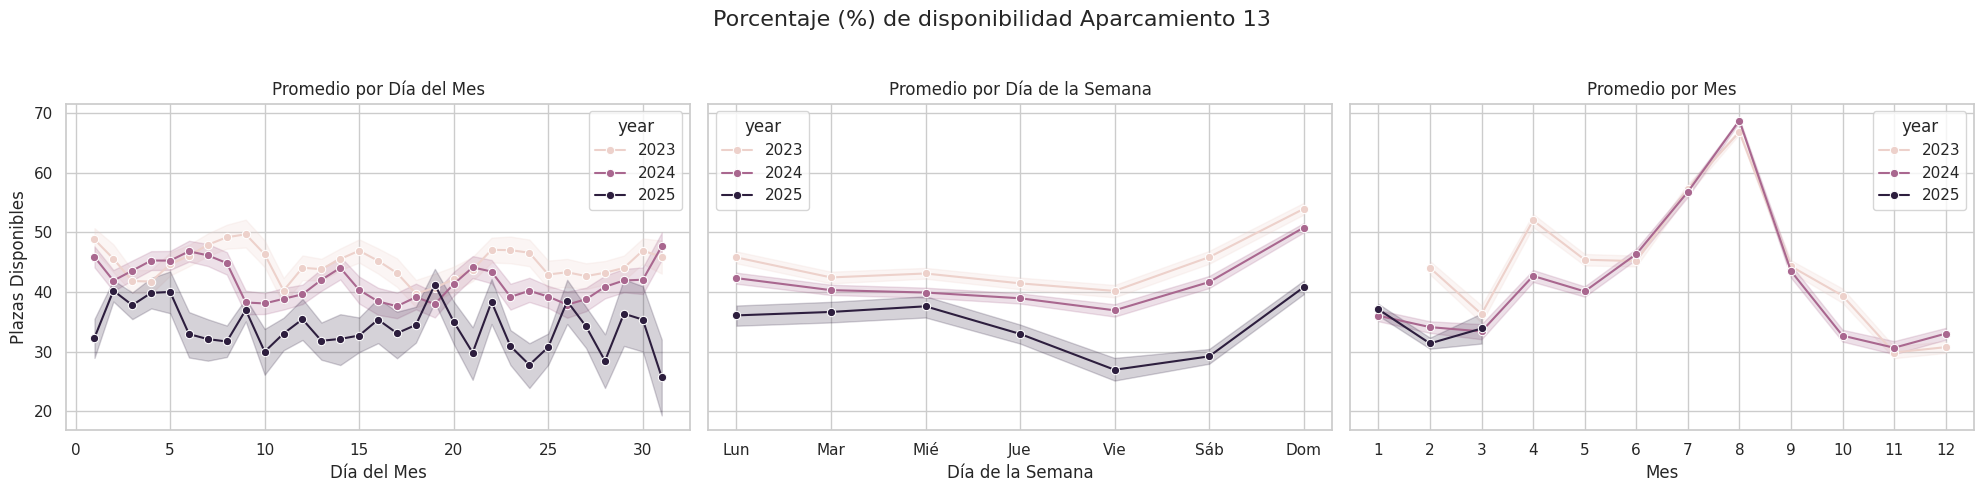

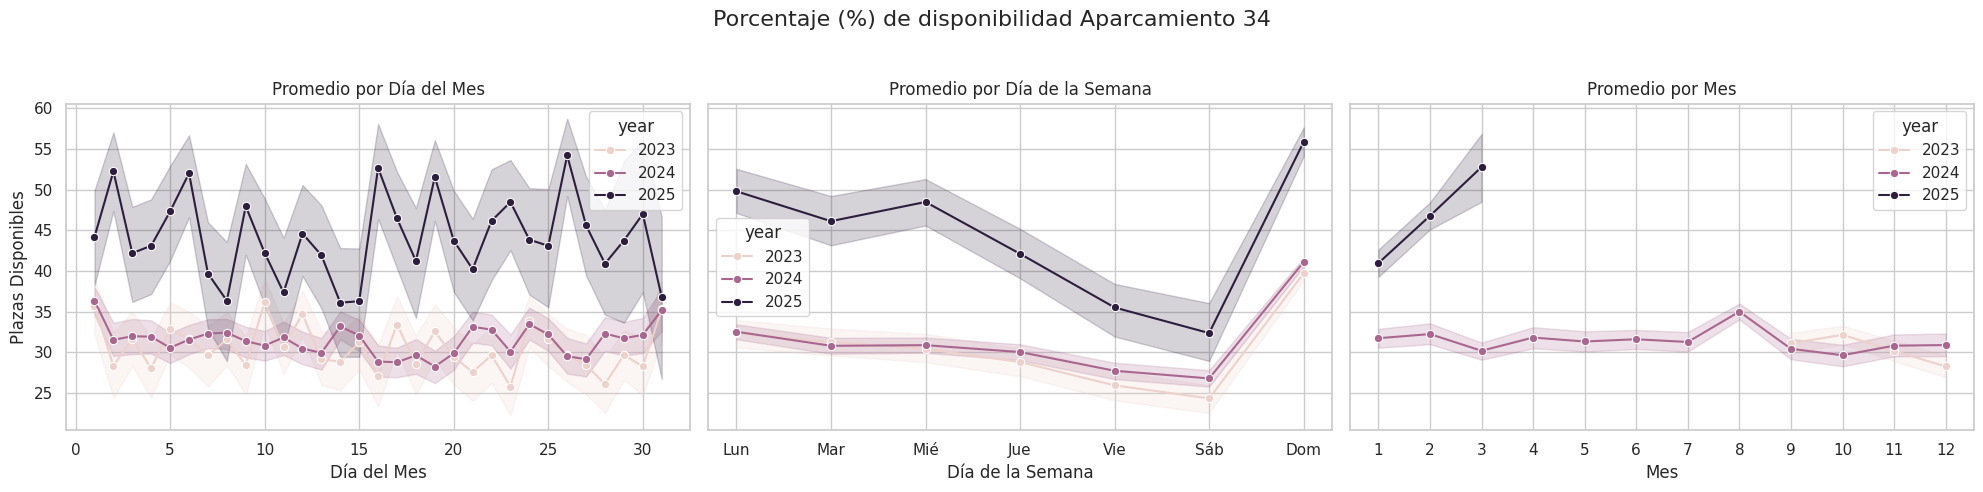

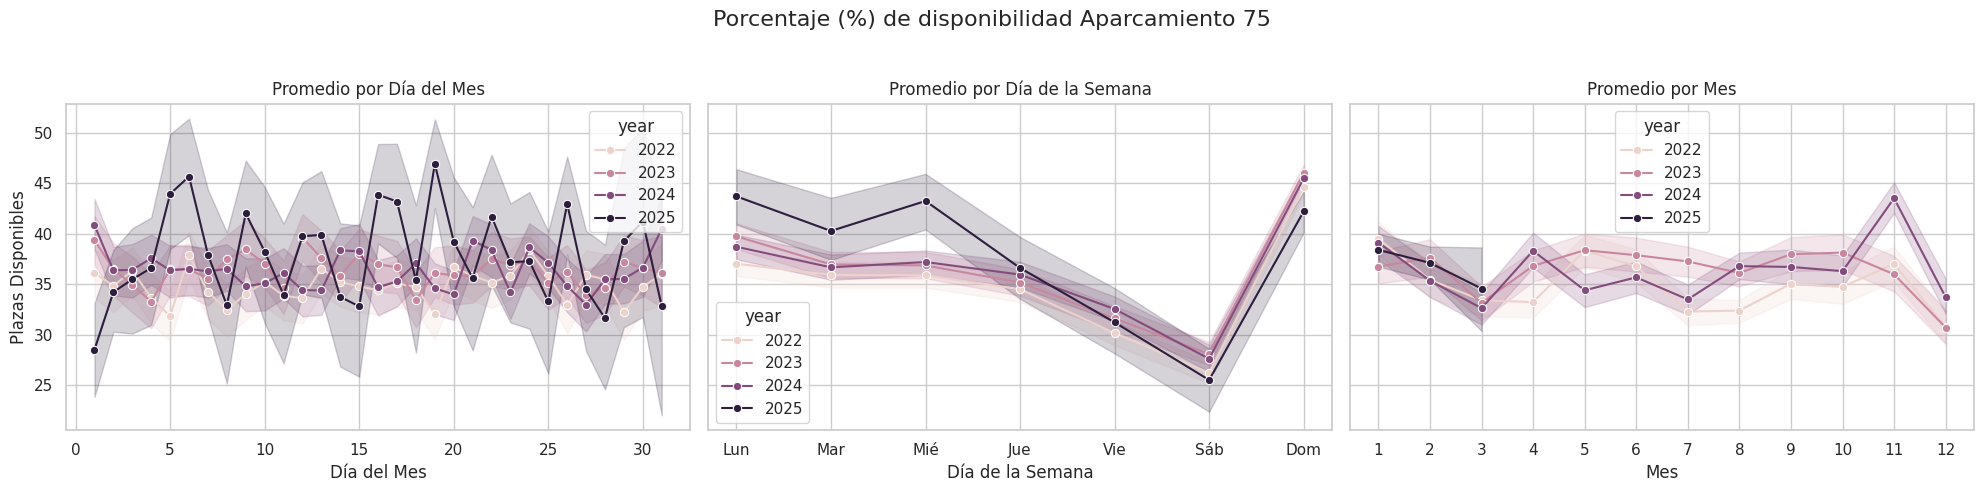

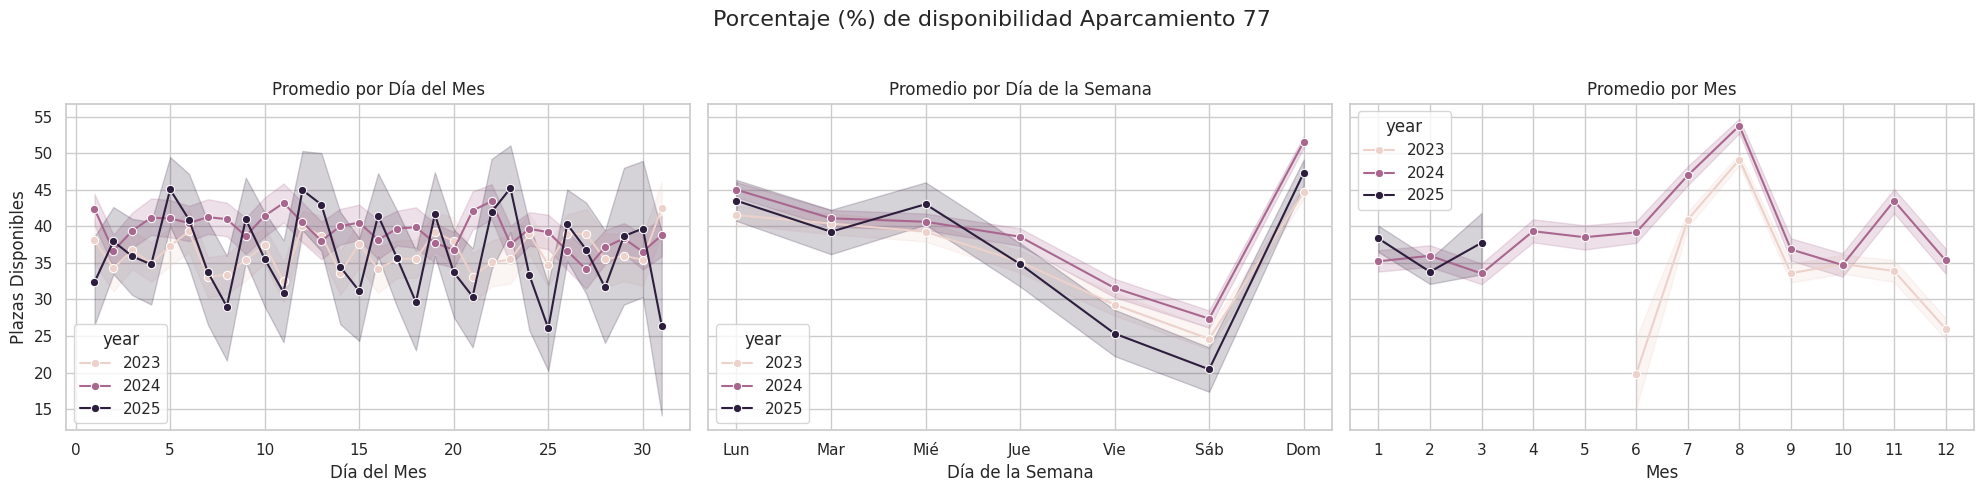

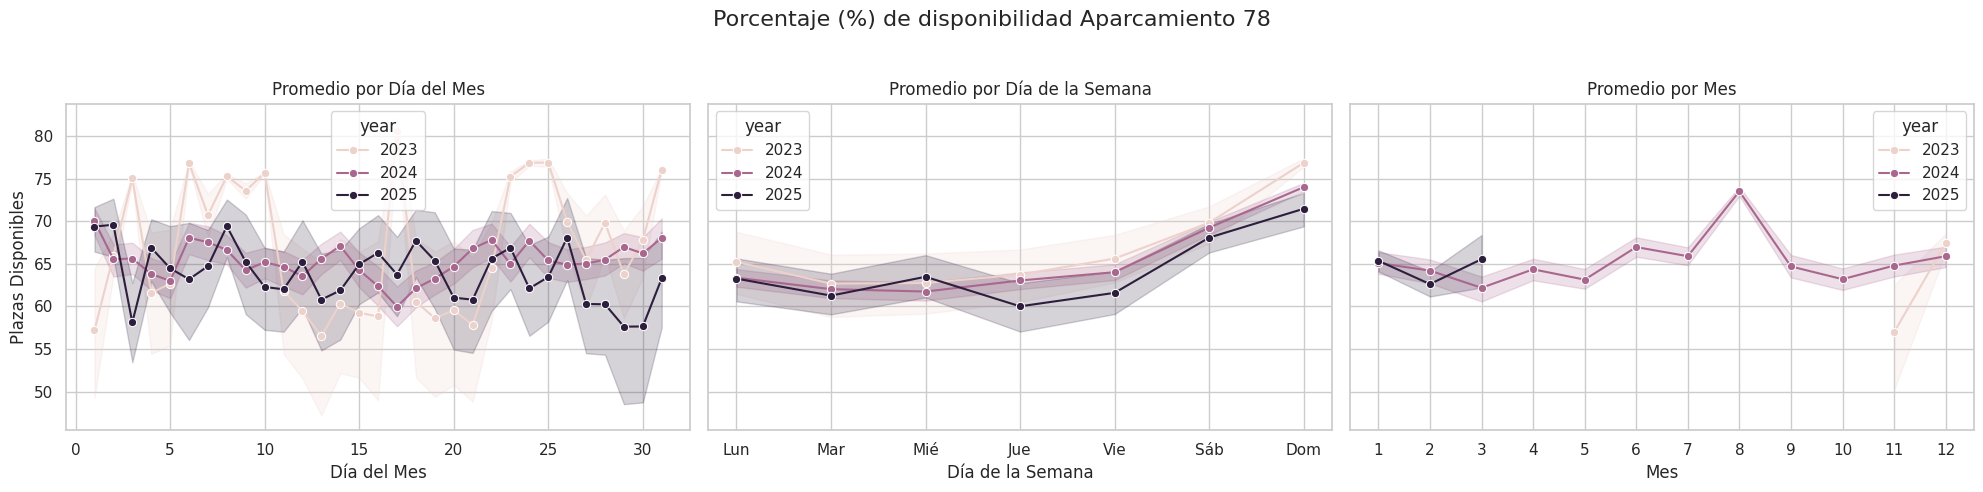

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set_theme(style="whitegrid")

# Asegúrate de que 'timestamp' es datetime si no lo está ya
df['timestamp'] = pd.to_datetime(df.index)

# Generamos un gráfico por cada aparcamiento
for aparcamiento_id in df['idAparcamiento'].unique():
    df_aparc = df[df['idAparcamiento'] == aparcamiento_id]

    # Crear rejilla: 1 fila, 3 columnas
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    fig.suptitle(f'Porcentaje (%) de disponibilidad Aparcamiento {aparcamiento_id}', fontsize=16)

    # 1. Día del mes
    sns.lineplot(
        data=df_aparc,
        x='day', y='PorcPlazasDisponibles',
        hue='year', ax=axs[0], errorbar=('ci', 95), marker='o'
    )
    axs[0].set_title('Promedio por Día del Mes')
    axs[0].set_xlabel('Día del Mes')
    axs[0].set_ylabel('Plazas Disponibles')

    # 2. Día de la semana
    sns.lineplot(
        data=df_aparc,
        x='weekday', y='PorcPlazasDisponibles',
        hue='year', ax=axs[1], errorbar=('ci', 95), marker='o'
    )
    axs[1].set_title('Promedio por Día de la Semana')
    axs[1].set_xlabel('Día de la Semana')
    axs[1].set_xticks(range(7))
    axs[1].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])

    # 3. Por mes
    sns.lineplot(
        data=df_aparc,
        x='month', y='PorcPlazasDisponibles',
        hue='year', ax=axs[2], errorbar=('ci', 95), marker='o'
    )
    axs[2].set_title('Promedio por Mes')
    axs[2].set_xlabel('Mes')
    axs[2].set_xticks(range(1, 13))

    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()


## Determinar estacionalidad de la serie
Los gráficos anteriores nos dan una idea de como se comportan los datos, pero para analizar el comportamiento estacional de la serie, es necesario alcular el **periodograma**

PERIODOGRAMA: Herramienta que analiza las frecuencias en una serie temporal. 
-	Una ST se descompone en ondas de diferentes frecuencias y amplitudes para identificar patrones repetitivos (ciclos o estacionalidad) para analizar variaciones semanales, anuales o tendencias
o	Si hay estacionalidad, el periodograma lo captura
Pasos
1.	Eliminar la tendencia de la serie temporal (detrend)
2.	Usar la f. de periodograma de SciPy para calcular frecuencias dominantes en datos.
3.	Graficar el periodograma y detectar los principales patrones estacionales 


In [18]:
df

,idAparcamiento,PlazasTotales,PlazasDisponibles,PorcPlazasDisponibles,year,month,day,weekday,timestamp
timestamp,,,,,,,,,
2023-02-03 10:00:00,6,372.0,60.0,16.129032,2023,2,3,4,2023-02-03 10:00:00
2023-02-03 11:00:00,6,372.0,48.0,12.903226,2023,2,3,4,2023-02-03 11:00:00
2023-02-03 12:00:00,6,372.0,66.0,17.741935,2023,2,3,4,2023-02-03 12:00:00
2023-02-03 13:00:00,6,372.0,119.0,31.989247,2023,2,3,4,2023-02-03 13:00:00
2023-02-03 14:00:00,6,372.0,155.0,41.666667,2023,2,3,4,2023-02-03 14:00:00
...,...,...,...,...,...,...,...,...,...
2025-03-05 03:00:00,78,464.0,355.0,76.508621,2025,3,5,2,2025-03-05 03:00:00
2025-03-05 04:00:00,78,464.0,355.0,76.508621,2025,3,5,2,2025-03-05 04:00:00
2025-03-05 05:00:00,78,464.0,356.0,76.724138,2025,3,5,2,2025-03-05 05:00:00


In [9]:
from scipy import signal

def detrend_aparcamiento(df, aparcamiento_id):
    """
    Detrend lineal de la serie 'PlazasDisponibles' para un aparcamiento específico,
    usando scipy.signal.detrend
    """
    df_with_trend = df[df['idAparcamiento'] == aparcamiento_id]

    #signal.detrend: elimina tendencia de los datos originales.
    #(ajusta una recta por minimos por cuadrados y la resta a los datos originales)
    df_detrended = signal.detrend(df_with_trend['PlazasDisponibles'].values)

    # tendencia: serie original - serie sin tendencia
    trend = df_with_trend['PlazasDisponibles'].values - df_detrended

    return df_detrended, trend, df_with_trend


In [10]:
def summarise_periodicity_aparcamiento(df_detrended):
    """
    Extrae las 3 principales frecuencias del periodograma,
    evitando división por cero en f = 0 (frecuencia constante).
    """
    f, Pxx = signal.periodogram(df_detrended)

    # Evitar dividir por cero
    mask = f != 0
    interval = 1 / f[mask]
    power = Pxx[mask]

    df_periodogram = pd.DataFrame({
        'interval (hours)': interval,
        'power_spectral_density': power
    })

    return df_periodogram.sort_values(by='power_spectral_density', ascending=False).head(3)



In [11]:
from matplotlib.dates import DateFormatter
def plot_aparcamiento_trend(df_with_trend, trend, df_detrended):
    """
    Gráfica de serie original con tendencia y sin tendencia
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(df_with_trend['timestamp'], df_with_trend['PlazasDisponibles'], label='Original')
    ax[0].plot(df_with_trend['timestamp'], trend, label='Tendencia', color='orange')
    ax[0].set_title('Plazas con tendencia')
    ax[0].set_ylabel('Plazas Disponibles')
    ax[0].legend()

    ax[1].plot(df_with_trend['timestamp'], df_detrended, color='purple')
    ax[1].set_title('Serie sin tendencia')

    # Formato de fechas más claro
    date_fmt = DateFormatter("%Y-%m")
    for a in ax:
        a.tick_params(axis='x', rotation=45)
        a.xaxis.set_major_formatter(date_fmt)

    plt.show()


In [12]:
def plot_periodicity_aparcamiento(df_detrended):
    """
    Periodograma para identificar estacionalidad
    """
    f, Pxx = signal.periodogram(df_detrended)
    plt.figure(figsize=(8, 3))
    plt.plot(f, Pxx)
    plt.title("Periodograma")
    plt.xlabel('Frecuencia')
    plt.ylabel('Densidad espectral de potencia')
    plt.show()


PARKING 6


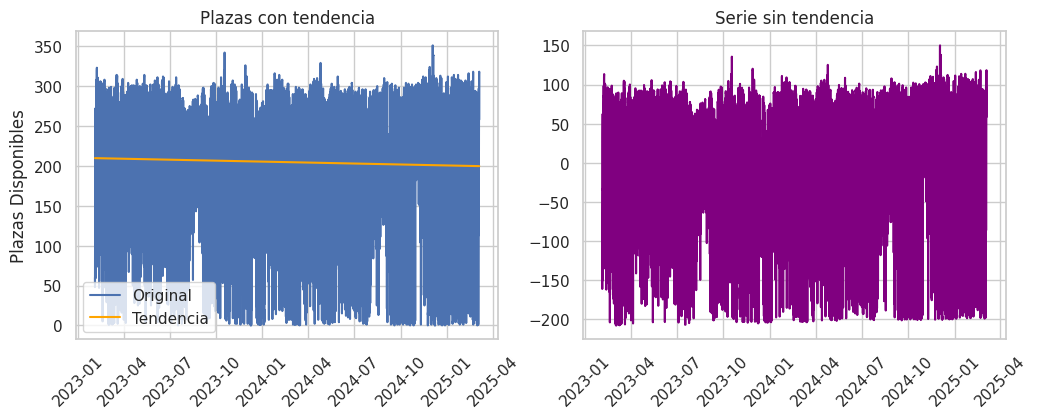

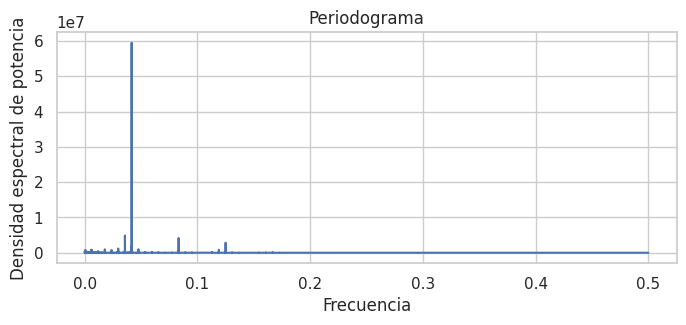

      interval (hours)  power_spectral_density
760          23.997372            5.948171e+07
651          28.009202            4.881879e+06
1521         11.998686            4.166307e+06


PARKING 7


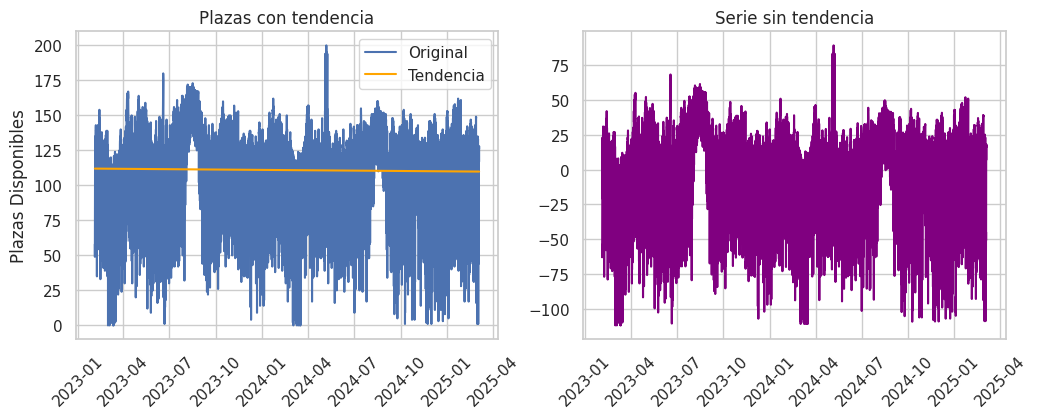

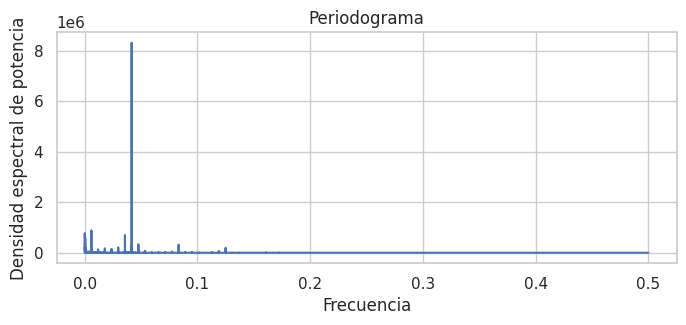

     interval (hours)  power_spectral_density
760         23.997372            8.321588e+06
108        167.541284            8.856419e+05
1         9131.000000            7.768816e+05


PARKING 8


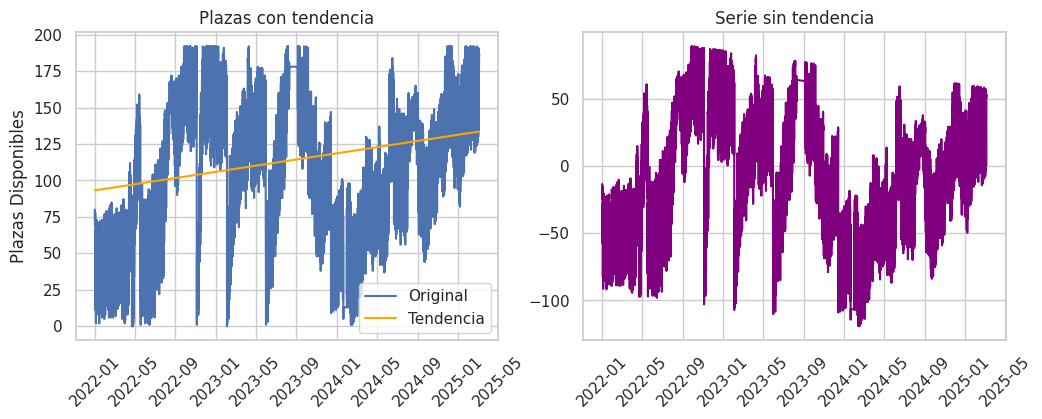

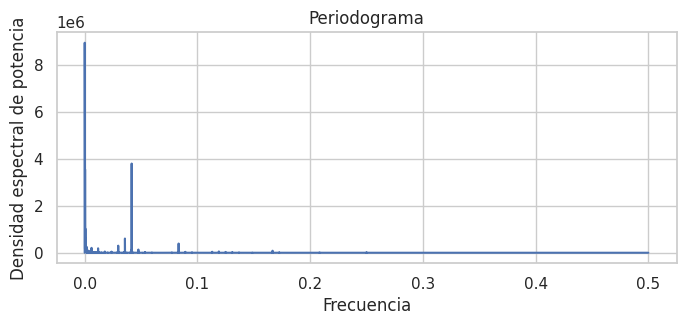

   interval (hours)  power_spectral_density
0           27816.0            8.951077e+06
1           13908.0            7.337135e+06
2            9272.0            7.158493e+06


PARKING 13


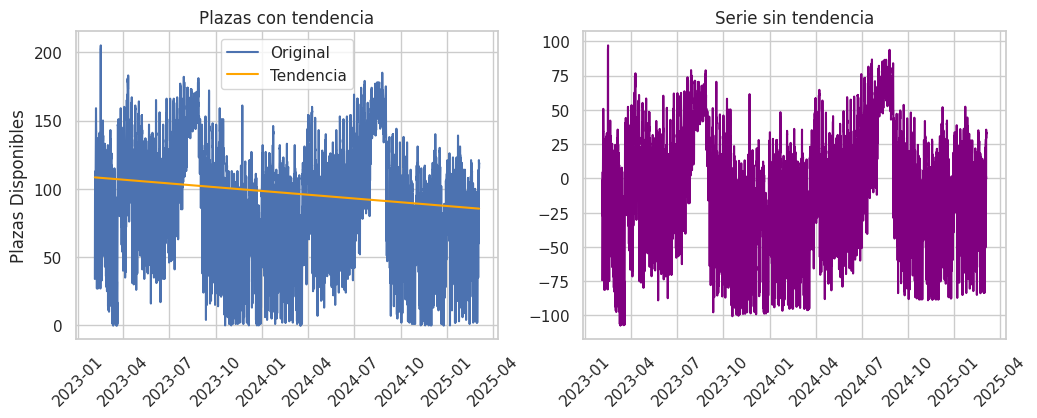

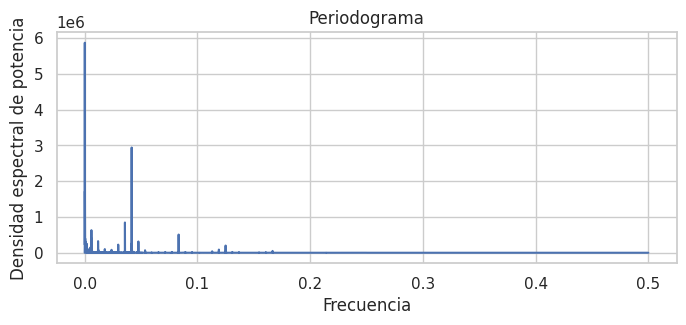

     interval (hours)  power_spectral_density
1         9131.000000            5.874004e+06
760         23.997372            2.943318e+06
3         4565.500000            1.718579e+06


PARKING 34


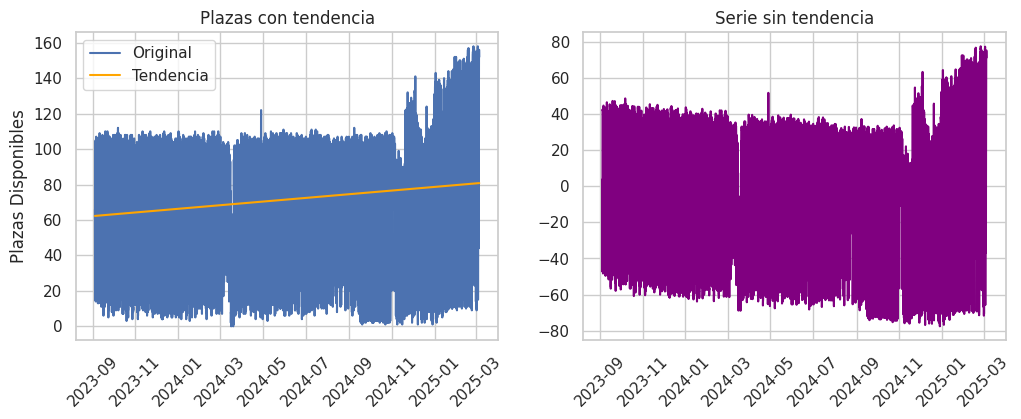

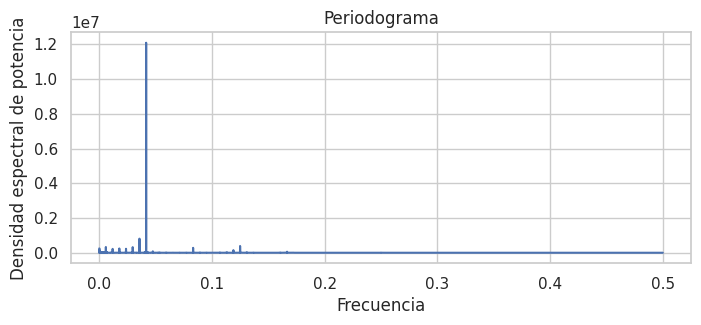

      interval (hours)  power_spectral_density
547          24.001825            1.208966e+07
469          27.985106            8.112846e+05
1643          8.000608            3.896491e+05


PARKING 75


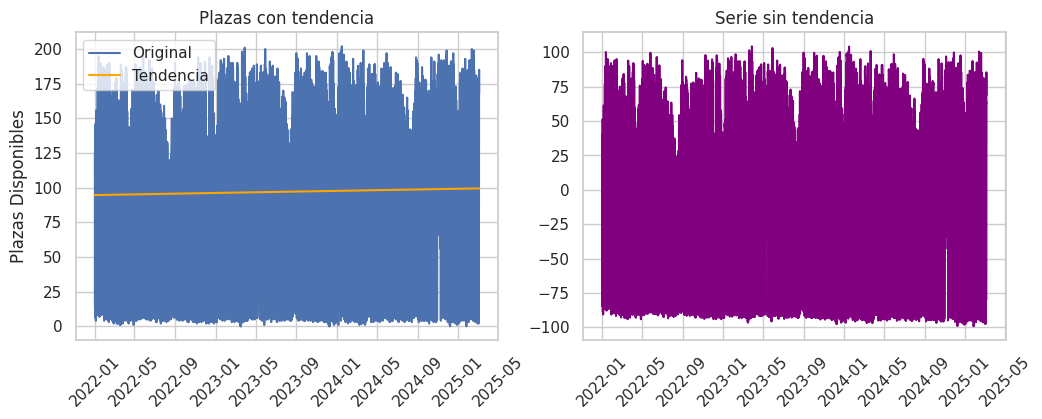

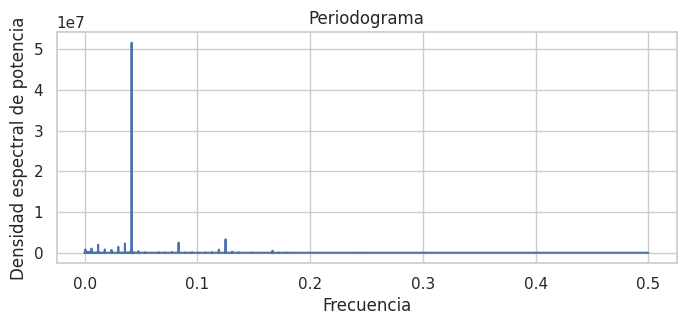

      interval (hours)  power_spectral_density
1158         23.998274            5.160035e+07
3476          7.999425            3.299407e+06
2317         11.999137            2.485436e+06


PARKING 77


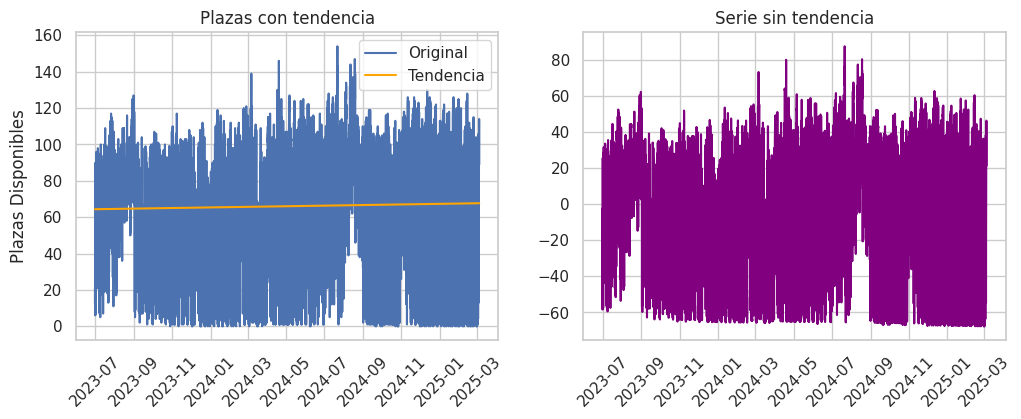

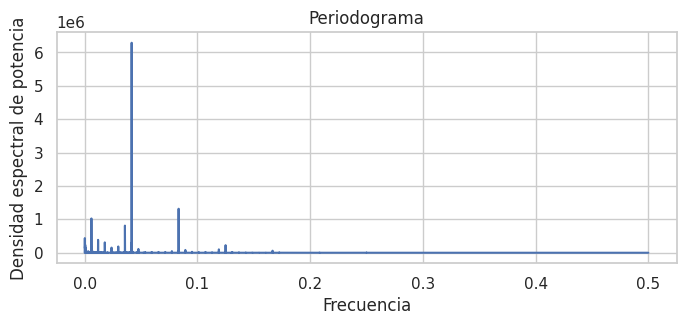

      interval (hours)  power_spectral_density
613          24.000000            6.289566e+06
1227         12.000000            1.318076e+06
87          167.454545            1.026766e+06


PARKING 78


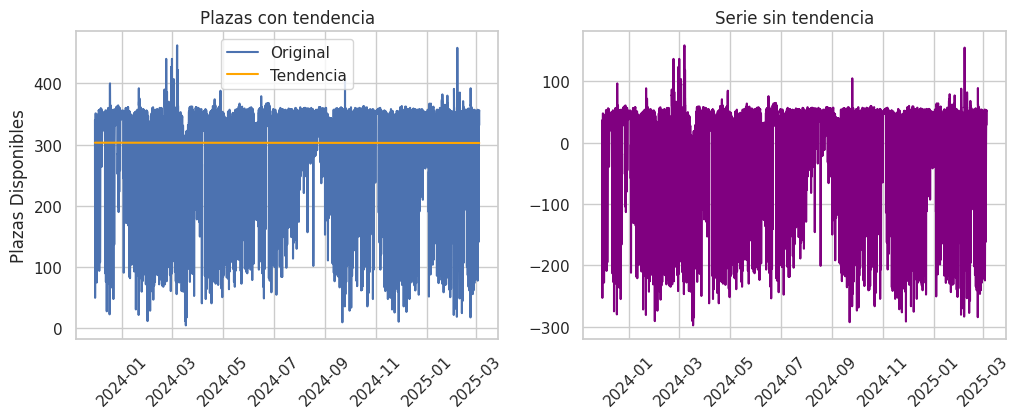

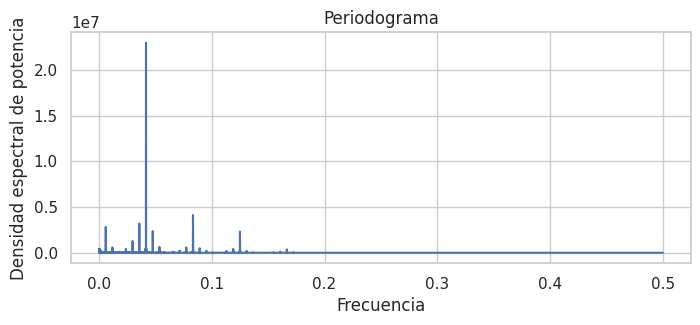

     interval (hours)  power_spectral_density
461         24.004329            2.298810e+07
923         12.002165            4.129980e+06
395         28.005051            3.187579e+06




In [13]:
for i in df["idAparcamiento"].unique():
    print("PARKING", i)
    df_detrended, trend, df_series = detrend_aparcamiento(df, i)
    plot_aparcamiento_trend(df_series, trend, df_detrended)
    plot_periodicity_aparcamiento(df_detrended)
    print(summarise_periodicity_aparcamiento(df_detrended))
    print("\n")


Como se puede observar el periodograma es muy informativo, muestra comportamientos cíclicos en cada serie temporal para cada parking.

PARKING 6:
-	Cada 24 horas
-	Cada 28 horas
-	Cada 12 horas

PARKING 7:
-	Cada 24 horas
-	Cada 167/24 = 7 días
-	Cada 9131/24/30 = 1 año

PARKING 7:
-	Cada 9272 /24/31 = 12 meses

PARKING 13
-	Cada 9131/24/31 = 12 meses
-	Cada 24 horas
-	Cada 4565/24/31 = 6 meses

PARKING 13
-	Cada 9131/24/31 = 12 meses
-	Cada 24 horas
-	Cada 4565/24/31 = 6 meses

PARKING 34
-	Cada 24 horas
-	Cada 28 horas
-	Cada 8 horas

PARKING 75
-	Cada 24 horas
-	Cada 8 horas
-	Cada 12 horas

PARKING 77
-	Cada 24 horas
-	Cada 12 horas
-	Cada 167/24 = 7 días

PARKING 78
-	Cada 24 horas
-	Cada 12 horas
-	Cada 28 horas

